<a href="https://colab.research.google.com/github/Mafunamiii/DataMining/blob/main/WebScrapeDataMiningProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title DATA WAREHOUSING AND DATA MINING LABORATORY
# Activity name: Data Mining Process
# Members:
#   Amarillento, Jahnreil J.
#   Perez, Mon Andre V.
#   Sison, Anton Gabriel T.
#   Tam-Od, Elijah M.

In [ ]:
#@title Importing libraries

# Data acquisition imports ====
from bs4 import BeautifulSoup
# importing beautifulsoup to parse through HTML and xml documents used for web scraping
import requests
# importing requests for creating and sending HTTP requests to web servers

import pandas as pd
# importing pandas for data analysis and dataframe manipulation
import numpy as np
# importing numpy for numerical computations, used for its functions in performing mathematical computations
import seaborn as sns
# importing seabon for plotting such as heatmap and pairplot
import matplotlib.pyplot as plt
# importing pyplot for plotting histograms and plot formatting
from scipy.stats import zscore
# importing zscore for pre-processing normalization purposes
from sklearn.preprocessing import RobustScaler
# importing robustScaler for pre-processing normalization purposes
from sklearn.model_selection import train_test_split
# importing train test split for model building, training, and testing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# importing evaluation metrics used for determining model performance and accuracy

# Data modeling imports =====
from sklearn.linear_model import LinearRegression
# importing LinearRegression
from sklearn.ensemble import RandomForestRegressor
# importing RandomForestRegressor for Random forest regression
from sklearn.ensemble import GradientBoostingRegressor
# importing GradientBoostingRegressor for Gradient Boosting Regression
from keras.models import Sequential
# importing sequential which is the neural network that's going to be used for modeling
from keras.layers import Dense
# importing dense which is going to be a part of the entire neural network for the modeling
from sklearn.svm import SVR
# importing SVR for Support vector regression
from sklearn.linear_model import Lasso
# importing Lasso
from sklearn.linear_model import Ridge
# importing Ridge
import xgboost as xgb
# importing xgb for modeling
import lightgbm as lgb
# importing lgb for modeling
from sklearn.model_selection import GridSearchCV, KFold
# importing GridSearchCV for modeling,
# this is used to find the suitable parameters that are used for hyperparameters
# importing KFold that would be used in conjunction with GridSearchCV, this would be used for
# cross validation
from xgboost import XGBRegressor
# importing XGB regressor for modeling
from lightgbm import LGBMRegressor
# importing LGBM regressor for modeling


In [ ]:
#@title 1 Data Acquisition : Web scraping
# given in the lectures

url = "https://basketball.realgm.com/international/team-stats/2018/Averages"
# url for the dataset to be webscraped

page = requests.get(url)
# request the page

soup = BeautifulSoup(page.text, 'lxml')
# creating a soup object and the parser

table_body = soup.find('table')
# creating a table body to pass on the soup to find the table

row_data = []
# creating an empty list to store information

for row in table_body.find_all('tr'):
  #creating a table
  col = row.find_all('td')
  col = [ele.text.strip() for ele in col ]
  # stripping the whitespaces
  row_data.append(col)
  # append the column


df = pd.DataFrame(row_data)
# extracting all data on table entries

headers = []
# creating an empty list for headers
for i in soup.find_all('th'):
  #creating the table for headers
  col_name = i.text.strip().lower().replace(" ", "_")
  # replacing whitespaces
  headers.append(col_name)
  # appending the header

df = pd.DataFrame(row_data, columns=headers)
print(df.columns.tolist())
# checking the column names of the dataframe

df.to_csv('InternationalLeague2017_18_data.csv', index=False) #### Save DataFrame to CSV


['#', 'team', 'gp', 'mpg', 'ppg', 'fgm', 'fga', 'fg%', '3pm', '3pa', '3p%', 'ftm', 'fta', 'ft%', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg', 'tov', 'pf']


In [ ]:
print(df.dtypes)

#       object
team    object
gp      object
mpg     object
ppg     object
fgm     object
fga     object
fg%     object
3pm     object
3pa     object
3p%     object
ftm     object
fta     object
ft%     object
orb     object
drb     object
rpg     object
apg     object
spg     object
bpg     object
tov     object
pf      object
dtype: object


In [ ]:
#@title Converting to numerical values
numeric_cols = ['gp', 'mpg', 'ppg', 'fgm', 'fga', '3pm', '3pa', 'ftm', 'fta', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg', 'tov', 'pf']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Convert relevant columns to numeric data type


df.dropna(inplace=True)
# Drop rows with any missing values after converting to numeric

print(df.dtypes)

percentage_cols = ['fg%', '3p%', 'ft%']
# Clean and convert specific columns to numeric data type
for col in percentage_cols:
    df[col] = df[col].str.rstrip('%').astype(float)

df.dropna(inplace=True)
# Drop rows with any missing values after converting to numeric

print(df.dtypes)
# Checking the data types


#        object
team     object
gp      float64
mpg     float64
ppg     float64
fgm     float64
fga     float64
fg%      object
3pm     float64
3pa     float64
3p%      object
ftm     float64
fta     float64
ft%      object
orb     float64
drb     float64
rpg     float64
apg     float64
spg     float64
bpg     float64
tov     float64
pf      float64
dtype: object
#        object
team     object
gp      float64
mpg     float64
ppg     float64
fgm     float64
fga     float64
fg%     float64
3pm     float64
3pa     float64
3p%     float64
ftm     float64
fta     float64
ft%     float64
orb     float64
drb     float64
rpg     float64
apg     float64
spg     float64
bpg     float64
tov     float64
pf      float64
dtype: object


<ipython-input-6-180f91d5273f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

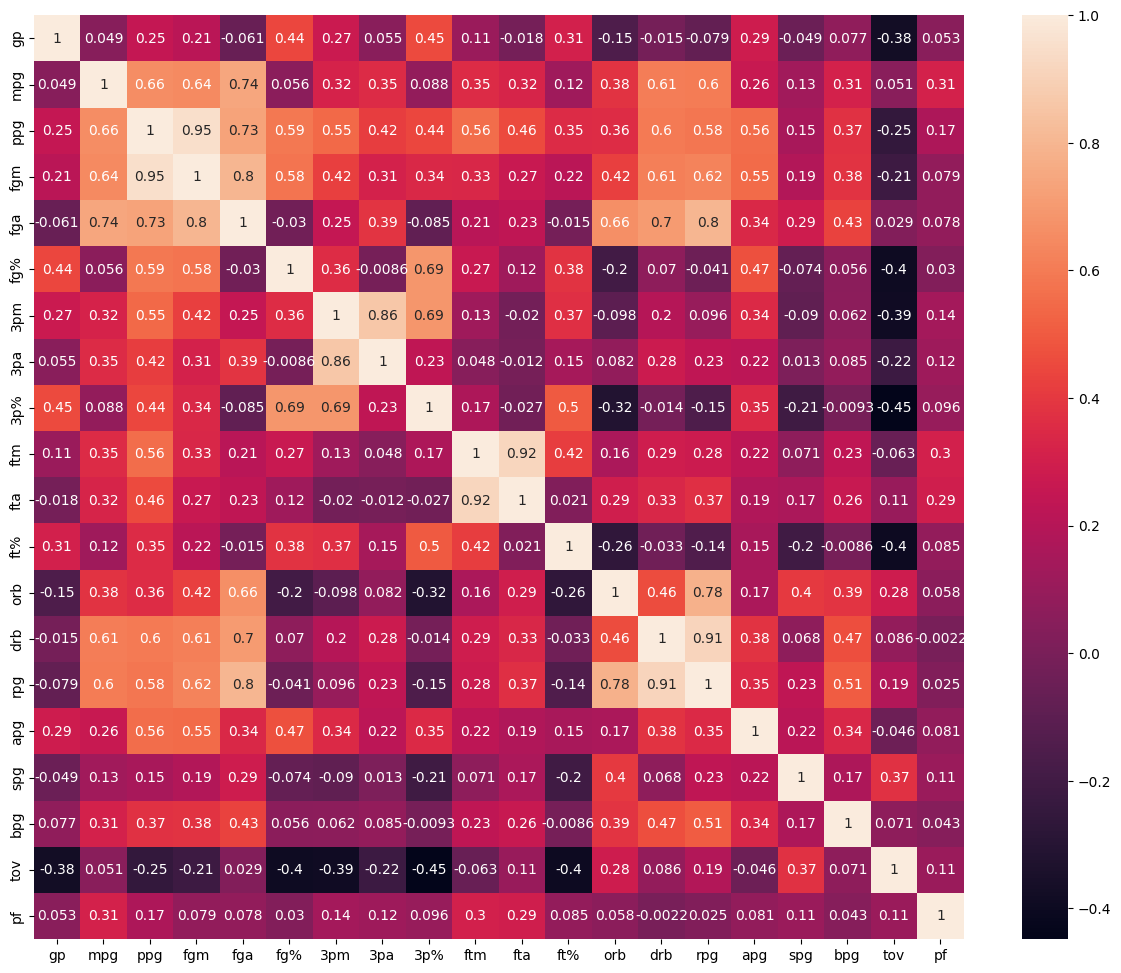

In [ ]:
#@title 2 Visualization : Observing feature correlation

correlation = df.corr()
# using pandas .corr() function to determine the correlation score of each feature with one another

plt.figure(figsize=(15, 12))
# Increase the size of the heatmap plot

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
# Create the heatmap


    mpg    ppg   fgm   3pm   3pa    ft%   tov
1  48.8  116.1  42.1   9.9  28.9  0.716  13.9
2  48.6  116.1  43.1  13.4  34.0  0.777  11.9
3  48.5  114.1  39.3   8.6  24.9  0.802  12.3
4  48.2  113.6  42.7  10.2  29.6  0.709  14.0
5  48.3  113.5  41.5  10.4  29.1  0.731  12.9


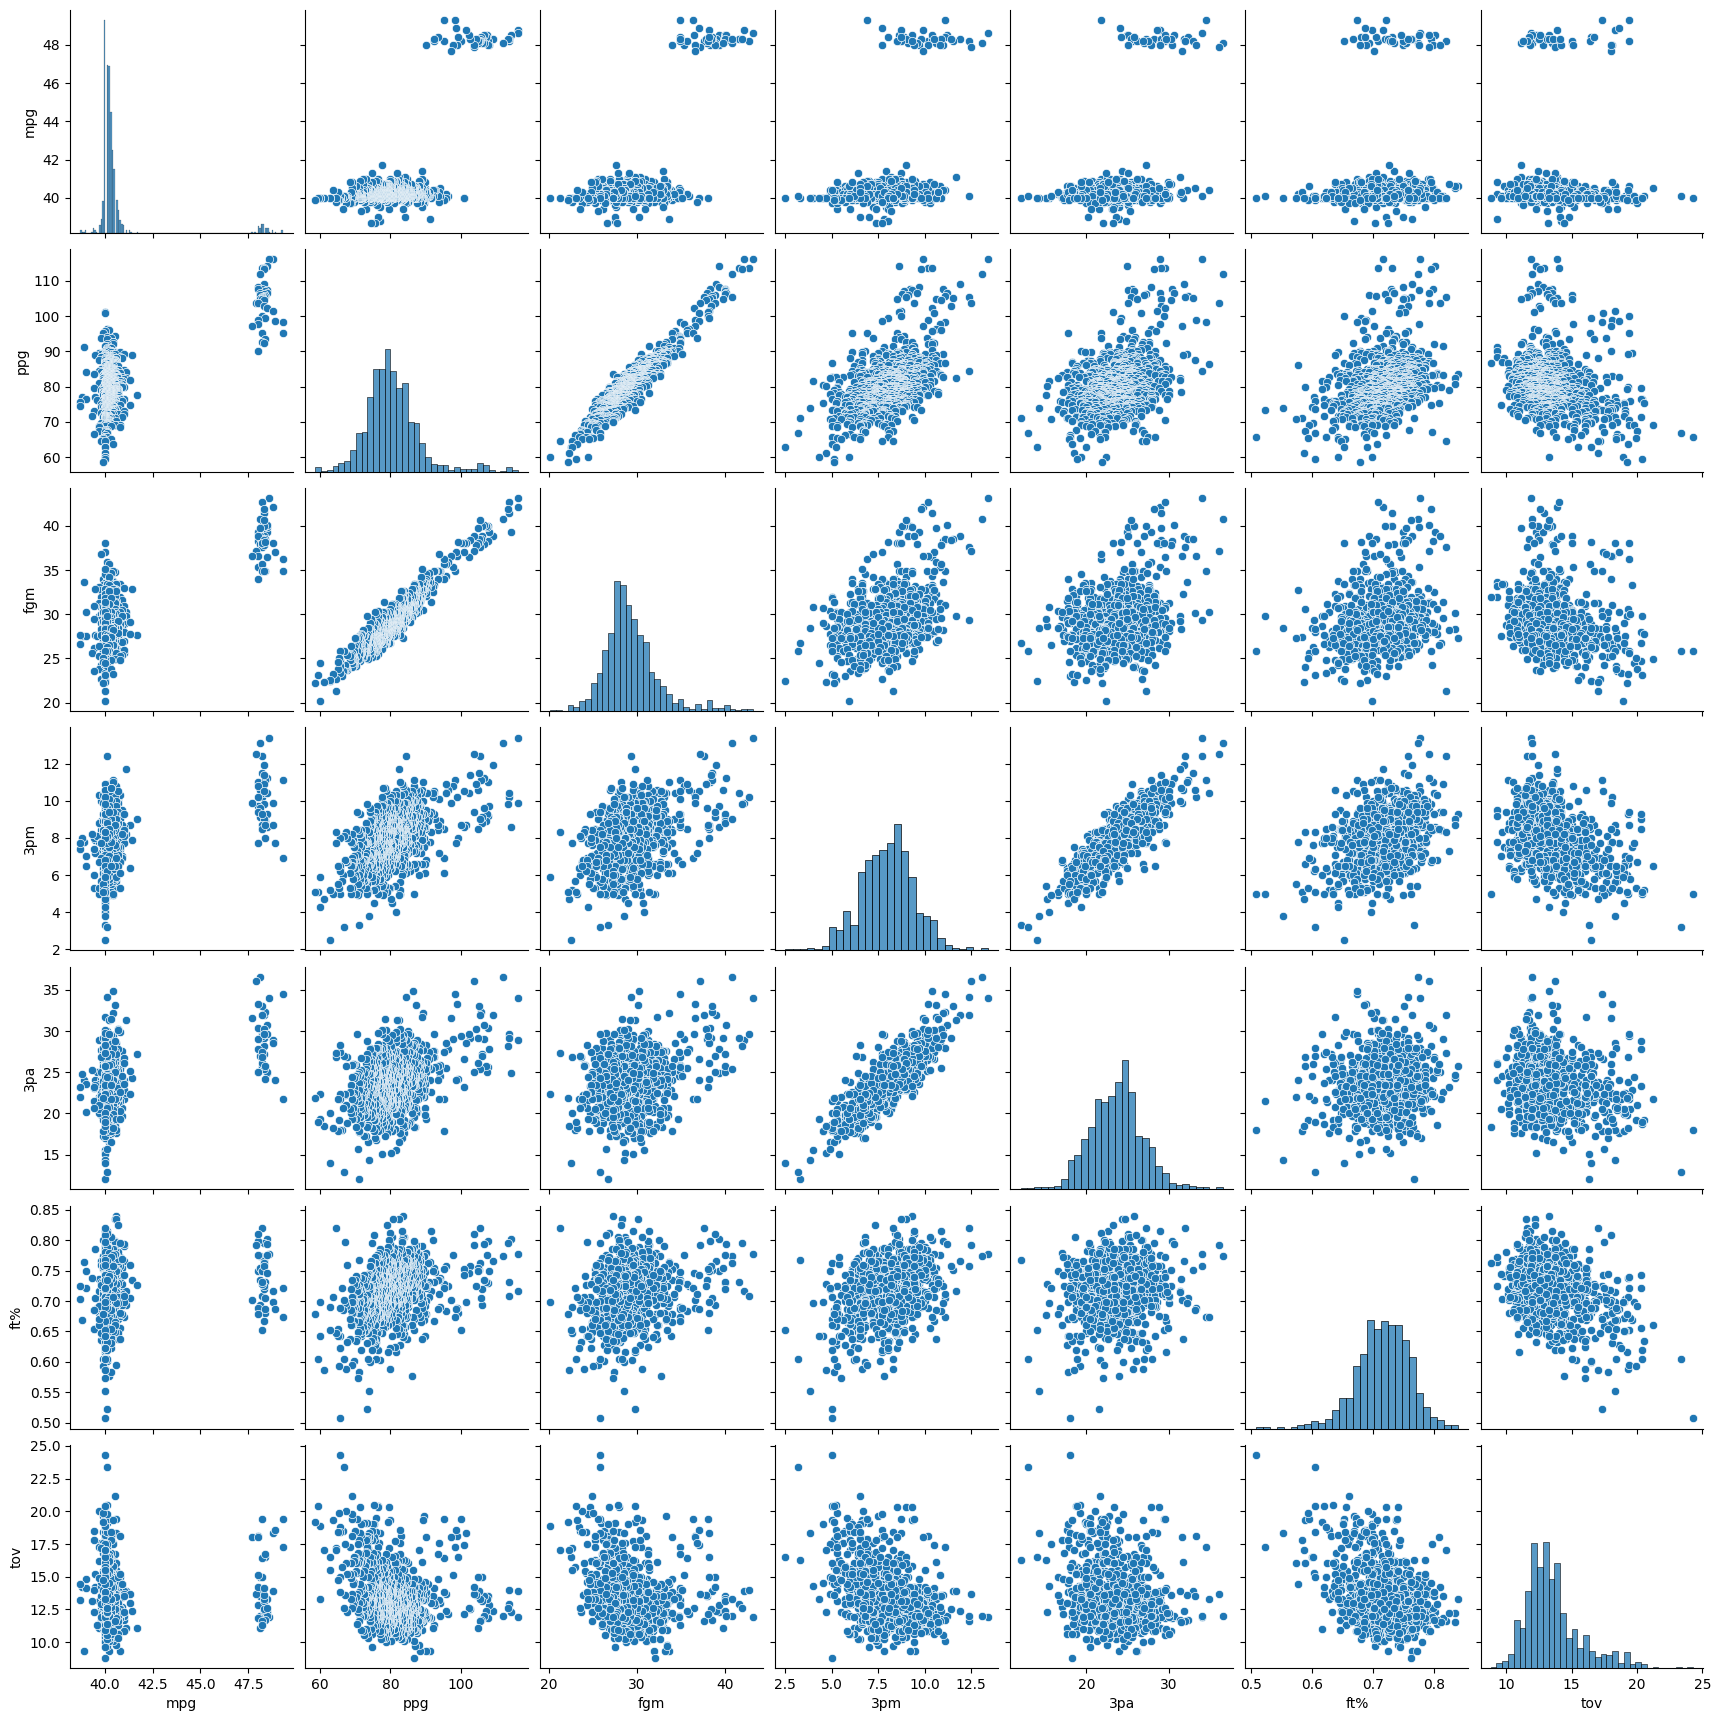

In [ ]:
#@title 3 Extracting features

extracted_df = df.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

dropCol = ['#', 'team', 'gp', 'fga', 'fg%', '3p%', 'ftm', 'fta', 'orb', 'drb', 'rpg', 'apg', 'spg', 'bpg','pf']
# list all columns to be dropped (columns that are considered irrelevant for the analysis)
# these are the unselected columns after observing the correlational heatmap above

extracted_df = extracted_df.drop(dropCol, axis=1)
# dropping the unselected columns with axis 1 indicating that it is columns that are going to be dropped

print(extracted_df.head())
# printing the dataframe ensuring that the selected features are all present

sns.pairplot(extracted_df)
# seeing the pairplot for the selected features, this pairplot provides both scatterplots and histograms
# that are useful in spotting outliers and distribution behavior

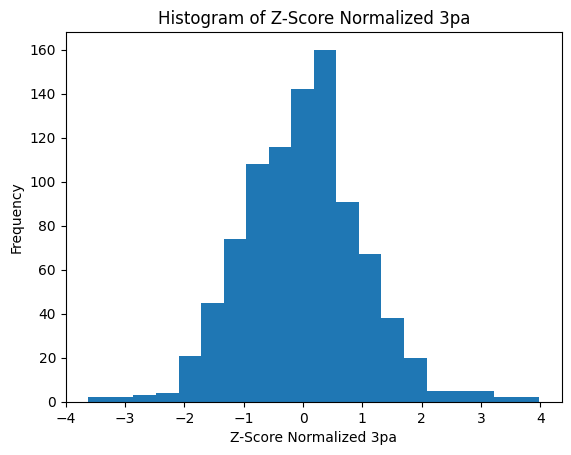

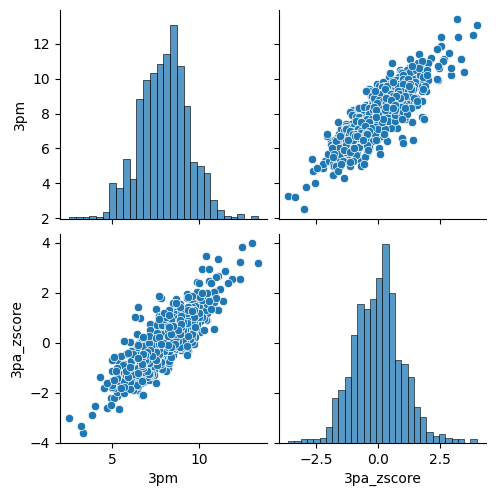

In [ ]:
#@title Pre-processing 3pa (z-score normalization)

extracted_dfP = extracted_df.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

extracted_dfP['3pa_zscore'] = zscore(extracted_dfP['3pa'])
# using the function zscore to compute for the zscore of the column '3pa' and assigning the values
# to a new column named '3pa_zscore'

extracted_dfP = extracted_dfP.drop('3pa', axis=1)
# with the new normalized column created above, the original column of '3pa' is now removed from the
# dataframe

# Display the historgram for the normalized column of '3pa'
plt.hist(extracted_dfP['3pa_zscore'], bins=20)
plt.xlabel('Z-Score Normalized 3pa')
plt.ylabel('Frequency')
plt.title('Histogram of Z-Score Normalized 3pa')
plt.show()

columns_of_interest = ['3pm', "3pa_zscore"]  # Specify the columns of interest
# columns to be displayed inside pairplot

sns.pairplot(data=extracted_dfP[columns_of_interest])
# Create the pairplot for the specified columns


<ipython-input-9-ddd361ccc7fd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mpg_scaled'] = scaler.fit_transform(df_filtered[['mpg']].values)


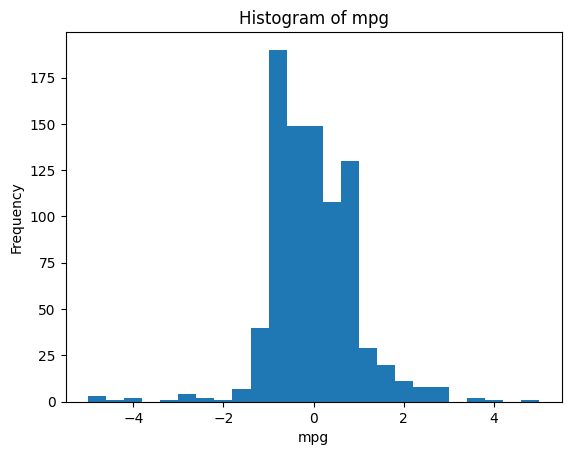

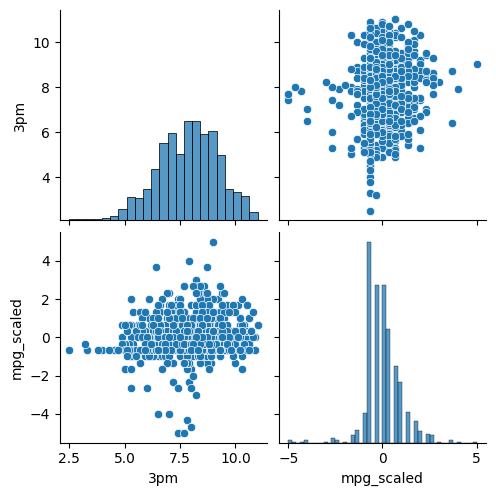

In [ ]:
#@title Pre-processing mpg (Robust Scaling)

# note:
# robust scaling is used to compensate for outliers present in the column

df_filtered = extracted_dfP.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

df_filtered = extracted_dfP[(extracted_dfP['mpg'] <= 45) & (extracted_dfP['3pm'] <= 11)]
# remove outlier based on the parameters given, outlier seen on pairplot above (correlation visualization)

scaler = RobustScaler()
# create an instance of RobustScaler for normalization


df_filtered['mpg_scaled'] = scaler.fit_transform(df_filtered[['mpg']].values)
# Fit and transform the data using the RobustScaler on the 'mpg' column in df_filtered
df_filtered = df_filtered.drop('mpg', axis = 1)
# Reshape the data to a 2D array as the scaler expects a 2D input

# Display the historgram for the normalized column of 'mpg'
plt.hist(df_filtered['mpg_scaled'], bins=25)
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.title('Histogram of mpg')
plt.show()

columns_of_interest = ['3pm', "mpg_scaled"]  # Specify the columns of interest
# columns to be displayed inside pairplot

sns.pairplot(data=df_filtered[columns_of_interest])
# Create the pairplot for the specified columns


<ipython-input-10-d55e6a781353>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ft%_scaled'] = scaler.fit_transform(df_filtered[['ft%']].values)


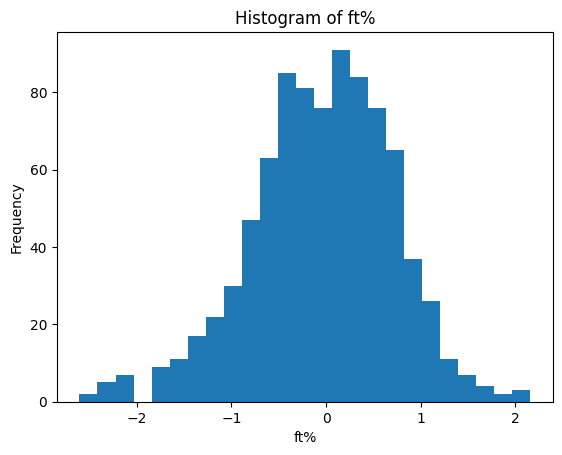

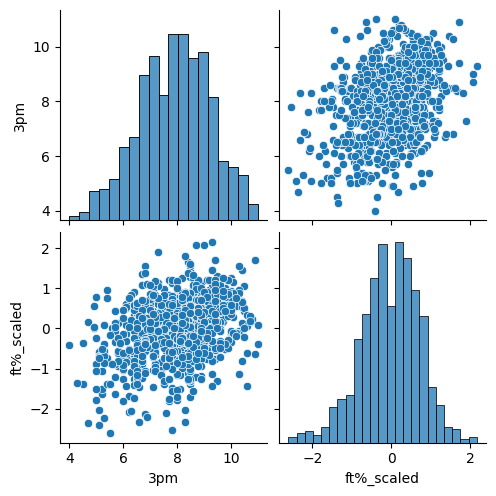

In [ ]:
#@title Pre-processing ft% (Robust Scaling)

# note:
# robust scaling is used to compensate for outliers present in the column

extracted_dfP = df_filtered.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

df_filtered = extracted_dfP[(extracted_dfP['ft%'] >= 0.57) & (extracted_dfP['3pm'] >= 4)]
# remove outlier based on the parameters given, outlier seen on pairplot above (correlation visualization)

scaler = RobustScaler()
# create an instance of RobustScaler for normalization


df_filtered['ft%_scaled'] = scaler.fit_transform(df_filtered[['ft%']].values)
# Fit and transform the data using the RobustScaler on the 'ft%' column in df_filtered
df_filtered = df_filtered.drop('ft%', axis = 1)
# Reshape the data to a 2D array as the scaler expects a 2D input

# Display the historgram for the normalized column of 'ft%'
plt.hist(df_filtered['ft%_scaled'], bins=25)
plt.xlabel('ft%')
plt.ylabel('Frequency')
plt.title('Histogram of ft%')
plt.show()

columns_of_interest = ['3pm', "ft%_scaled"]  # Specify the columns of interest
# columns to be displayed inside pairplot

sns.pairplot(data=df_filtered[columns_of_interest])
# Create the pairplot for the specified columns


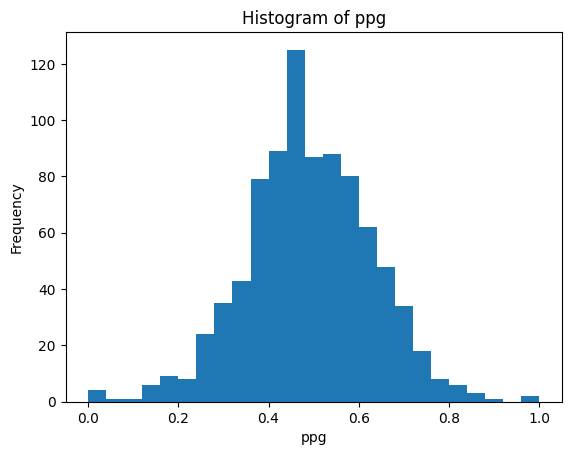

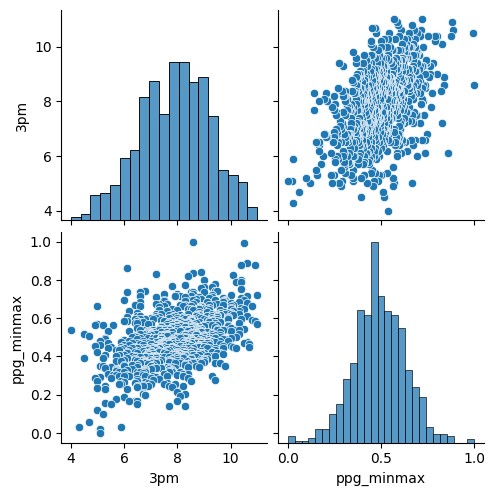

In [ ]:
#@title Pre-processing ppg (Min-max normalization)

extracted_dfP = df_filtered.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

min_value = df_filtered['ppg'].min()
# acquiring the minimum value of ppg to be used in min-max normalization using .min()
max_value = df_filtered['ppg'].max()
# acquiring the maximum value of ppg to be used in min-max normalization using .max()

df_filtered['ppg_minmax'] = (df_filtered['ppg'] - min_value) / (max_value - min_value)
# Apply min-max normalization to the 'Polio' column

df_filtered = df_filtered.drop('ppg', axis =1)
# with the new normalized column created above, the original column of 'ppg' is now removed from the
# dataframe

# Display the historgram for the normalized column of 'ppg'
plt.hist(df_filtered['ppg_minmax'], bins=25)
plt.xlabel('ppg')
plt.ylabel('Frequency')
plt.title('Histogram of ppg')
plt.show()

columns_of_interest = ['3pm', 'ppg_minmax']
# columns to be displayed inside pairplot

sns.pairplot(data=df_filtered[columns_of_interest])
# Create the pairplot for the specified columns



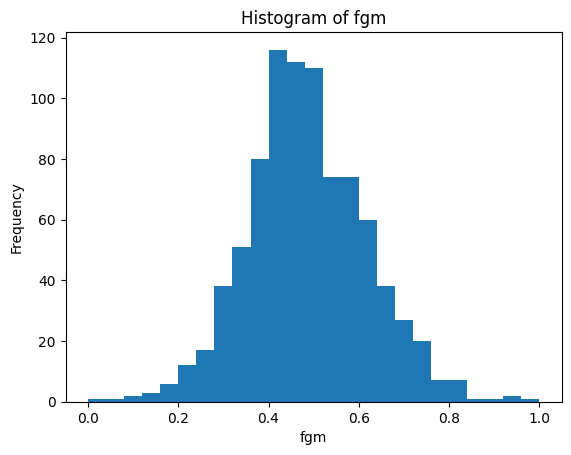

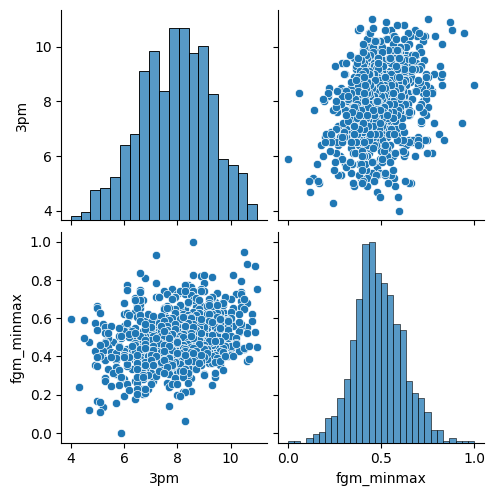

In [ ]:
#@title Pre-processing fgm (Min-max normalization)

extracted_dfP = df_filtered.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

min_value = df_filtered['fgm'].min()
# acquiring the minimum value of fgm to be used in min-max normalization using .min()
max_value = df_filtered['fgm'].max()
# acquiring the maximum value of fgm to be used in min-max normalization using .max()

df_filtered['fgm_minmax'] = (df_filtered['fgm'] - min_value) / (max_value - min_value)
# Apply min-max normalization to the 'fgm' column

df_filtered = df_filtered.drop('fgm', axis =1)
# with the new normalized column created above, the original column of 'fgm' is now removed from the
# dataframe

# Display the historgram for the normalized column of 'fgm'
plt.hist(df_filtered['fgm_minmax'], bins=25)
plt.xlabel('fgm')
plt.ylabel('Frequency')
plt.title('Histogram of fgm')
plt.show()

columns_of_interest = ['3pm', 'fgm_minmax']
# columns to be displayed inside pairplot

sns.pairplot(data=df_filtered[columns_of_interest])
# Create the pairplot for the specified columns



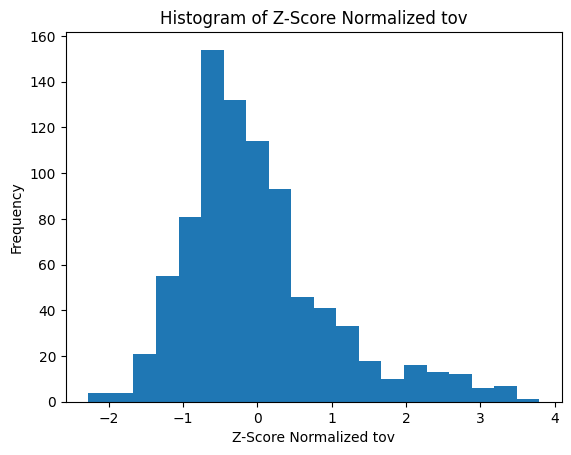

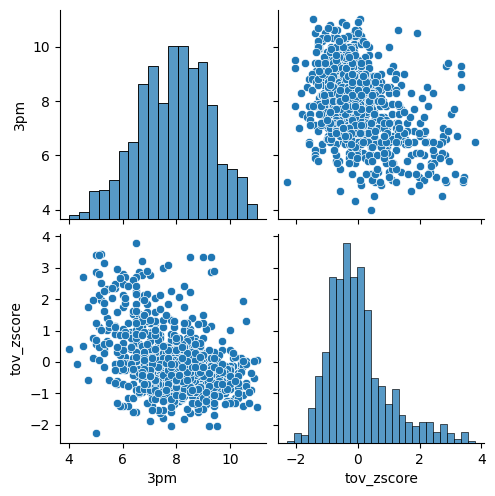

In [ ]:
#@title Pre-processing tov (z-score normalization)

extracted_dfP = df_filtered.copy()
# create a copy of the dataframe so that each cell can be executed without starting over
extracted_dfP['tov_zscore'] = zscore(extracted_dfP['tov'])
# using the function zscore to compute for the zscore of the column 'tov' and assigning the values
# to a new column named 'tov_zscore'

extracted_dfP = extracted_dfP.drop('tov', axis=1)
# with the new normalized column created above, the original column of 'tov' is now removed from the
# dataframe

# Display the historgram for the normalized column of 'tov'
plt.hist(extracted_dfP['tov_zscore'], bins=20)
plt.xlabel('Z-Score Normalized tov')
plt.ylabel('Frequency')
plt.title('Histogram of Z-Score Normalized tov')
plt.show()

columns_of_interest = ['3pm', "tov_zscore"]  # Specify the columns of interest
# columns to be displayed inside pairplot

sns.pairplot(data=extracted_dfP[columns_of_interest])
# Create the pairplot for the specified columns


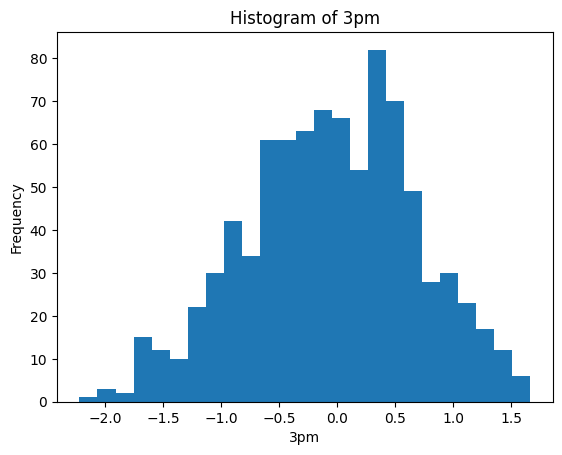

In [ ]:
#@title Pre-processing 3pm (Robust Scaling)

# note:
# robust scaling is used to compensate for outliers present in the column

df_filtered = extracted_dfP.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

scaler = RobustScaler()
# create an instance of RobustScaler for normalization


df_filtered['3pm_scaled'] = scaler.fit_transform(df_filtered[['3pm']].values)
# Fit and transform the data using the RobustScaler on the '3pm' column in df_filtered
df_filtered = df_filtered.drop('3pm', axis = 1)
# Reshape the data to a 2D array as the scaler expects a 2D input

# Display the historgram for the normalized column of '3pm'
plt.hist(df_filtered['3pm_scaled'], bins=25)
plt.xlabel('3pm')
plt.ylabel('Frequency')
plt.title('Histogram of 3pm')
plt.show()


In [ ]:
print(df_filtered.columns.tolist())

['3pa_zscore', 'mpg_scaled', 'ft%_scaled', 'ppg_minmax', 'fgm_minmax', 'tov_zscore', '3pm_scaled']


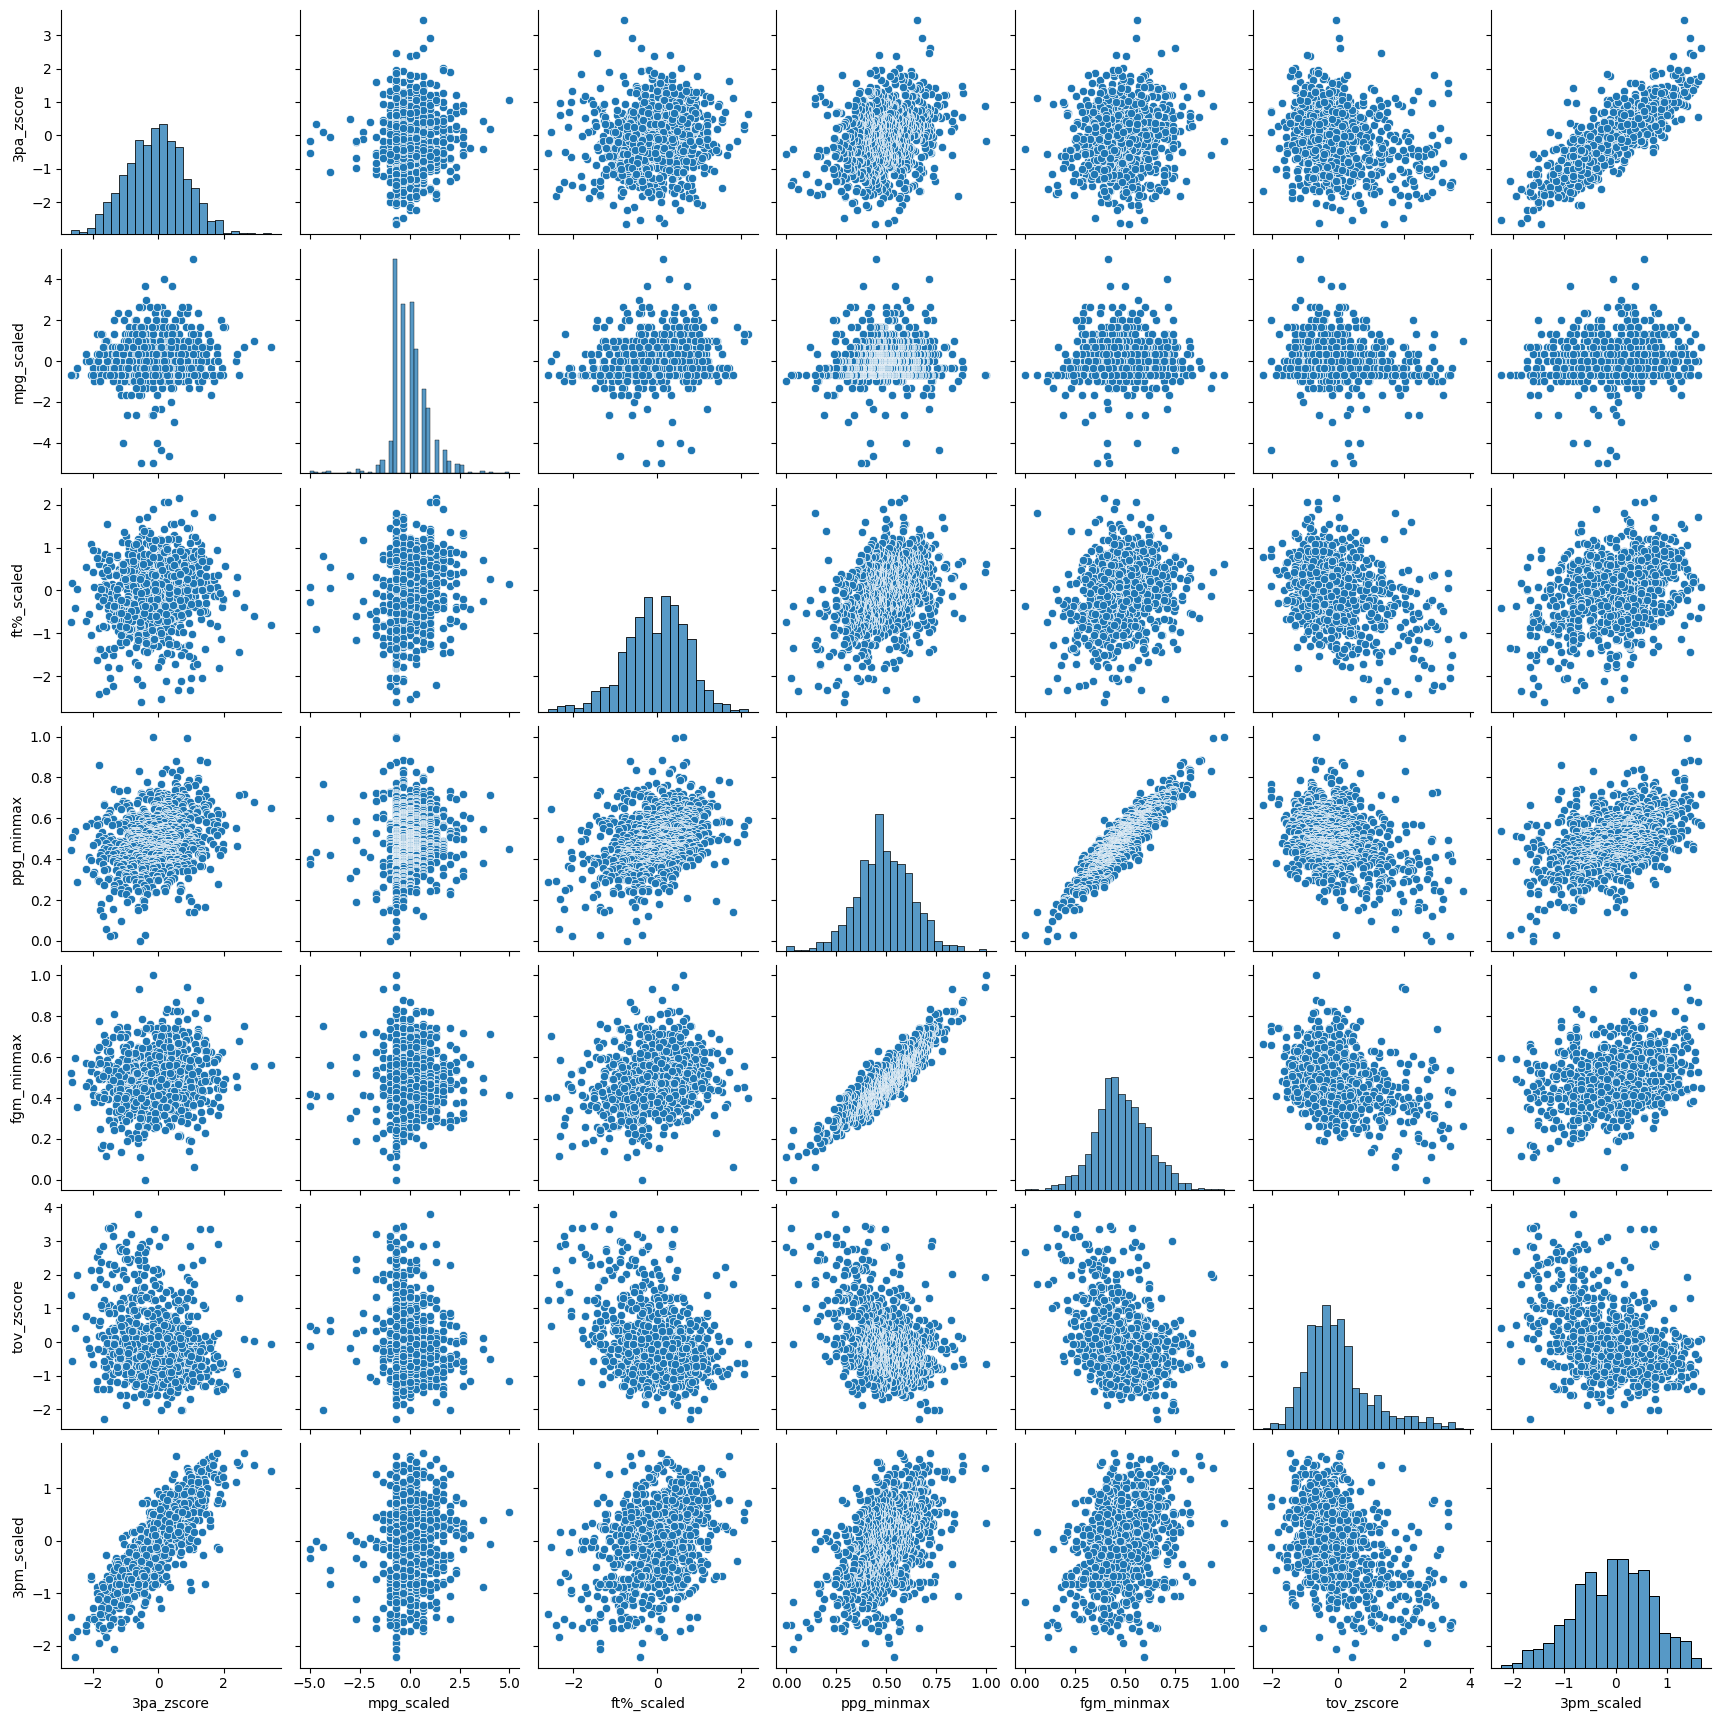

In [ ]:
sns.pairplot(df_filtered)
# seeing the pairplot for the selected features after pre-processing, this pairplot provides both scatterplots and histograms
# that are useful in spotting outliers and distribution behavior

In [ ]:
#@title Modeling : Data splitting

model_df = df_filtered.copy()
# create a copy of the dataframe so that each cell can be executed without starting over

X = model_df.drop('3pm_scaled', axis=1)
# assigning the predictors from the dataframe to X excluding the target variable
y = model_df['3pm_scaled']
# assigning the target variable which is the life expectancy to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Using train_test_split to split the dataset (x and y) into training and testing sets, by assigning
# the test_size to 0.2, the dataset is split into 80% for the training and 20% for the testing,
# the random_state of 42 ensures that we have a static random value so that the splitting can be
# replicated

In [ ]:
#@title Modeling : Linear Regression

model=LinearRegression()
# Creating an instance of LinearRegression to be used for modeling
model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred = model.predict(X_test)
# executing model prediction

MeanSQ = mean_squared_error(y_test, y_pred)
print('Mean squared error (lower is better): ', round(MeanSQ, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

r2 = r2_score(y_test, y_pred)
print('R2 score: ', round(r2*100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Mean squared error (lower is better):  0.092
R2 score:  84.721 %


In [ ]:
#@title Modeling : Random Forest Regression

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# creating an instance of Random forest regression with parameters
# n_estimators specifies the number of decision trees or estimators
# random_state specifies the random value so the test can be replicated

rf_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred = rf_model.predict(X_test)
# executing model prediction

MeanSQ = mean_squared_error(y_test, y_pred)
print('Mean squared error (lower is better): ', round(MeanSQ, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

r2 = r2_score(y_test, y_pred)
print('R2 score: ', round(r2*100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Mean squared error (lower is better):  0.116
R2 score:  80.646 %


In [ ]:
#@title Modeling : Gradient Boosting Regresssion

gb_model = GradientBoostingRegressor()
# creating an instance of Gradient boosting regression

gb_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred = gb_model.predict(X_test)
# executing model prediction

MeanSQ = mean_squared_error(y_test, y_pred)
print('Mean squared error (lower is better): ', round(MeanSQ, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

r2 = r2_score(y_test, y_pred)
print('R2 score: ', round(r2*100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Mean squared error (lower is better):  0.117
R2 score:  80.44 %


In [ ]:
#@title Modeling : Neural Network

model = Sequential()
# creates an instance of sequential which is going to serve as the backbone for the neural network
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# adds a "dense" layer to the model with 64 neurons (passed as a parameter) and activation of 'relu'
# which means Rectified Linear Unit. and using the X_train as the input for the first layer
model.add(Dense(32, activation='relu'))
# adds another "dense" layer to the model with 32 neurons with the input dimensions being automatically
# determined from the initial layer
model.add(Dense(1, activation='linear'))
# adds another "dense" layer to the model with 1 neuron with the input dimensions being automatically
# determined from the initial layer

model.compile(optimizer='adam', loss='mean_squared_error')
# compiling the model and setting the optimizer to adam which is used for training optimization
# the loss indicates the error to be used in determining the difference between the predicted values and
# actual values from the testing split

model.fit(X_train, y_train, epochs=100, batch_size=32)
# training the model with the training sets acquired from train_test_split

y_pred = model.predict(X_test).flatten()
# executing model prediction

MeanSQ = mean_squared_error(y_test, y_pred)
print('Mean squared error (lower is better): ', round(MeanSQ, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

r2 = r2_score(y_test, y_pred)
print('R2 score: ', round(r2*100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Epoch 1/100
22/22 [==============================] - 1s 4ms/step - loss: 0.3440
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1489
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1255
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1190
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1148
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1131
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1113
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1077
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1049
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 0.1033
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1040
Epoch 13/100
22/22 [=================

In [ ]:
#@title Modeling : SVR model

svr_model = SVR(kernel='rbf')
# Creating an instance of SVR to be used for modeling
# 'rbf' stands for radial basis function, a popular kernel for non-linear SVR

svr_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred_svr = svr_model.predict(X_test)
# executing model prediction

MSE_svr = mean_squared_error(y_test, y_pred_svr)
print('Mean squared error (lower is better): ', round(MSE_svr, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_svr = r2_score(y_test, y_pred_svr)
print('R2 score: ', round(R2_svr * 100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Mean squared error (lower is better):  0.095
R2 score:  84.133 %


In [ ]:
#@title Modeling : Lasso Regression

lasso_model = Lasso(alpha=0.01)
# Creating an instance of Lasso Model to be used for modeling
# alpha is the regularization strength (you can adjust this value)

lasso_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred_lasso = lasso_model.predict(X_test)
# executing model prediction


MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Mean squared error (lower is better): ', round(MSE_lasso, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_lasso = r2_score(y_test, y_pred_lasso)
print('R2 score: ', round(R2_lasso * 100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1


Mean squared error (lower is better):  0.094
R2 score:  84.313 %


In [ ]:
#@title Modeling : Ridge Regression

ridge_model = Ridge(alpha=1.0)
# Creating an instance of Ridge Model to be used for modeling
# alpha is the regularization strength (you can adjust this value)

ridge_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred_ridge = ridge_model.predict(X_test)
# executing model prediction


MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean squared error (lower is better): ', round(MSE_ridge, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_ridge = r2_score(y_test, y_pred_ridge)
print('R2 score: ', round(R2_ridge * 100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

Mean squared error (lower is better):  0.092
R2 score:  84.751 %


In [ ]:
#@title Modeling : XGBoost

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
# create an instance of xgb regressor for modeling
# objective of squarederror indicates the task and objective function which is squared error for training
# the squarederror indicates that he model would focus on regression with the MSE as it's goal of minimizing
# n_estimators indicate the number of trees (similar to random forest regression) to be built
# learning_rate indicates the amount of step size that the model would use for each iteration in processing
# towards its objective

xgb_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred_xgb = xgb_model.predict(X_test)
# executing model prediction

MSE_xgb = mean_squared_error(y_test, y_pred_xgb)
print('Mean squared error (lower is better): ', round(MSE_xgb, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_xgb = r2_score(y_test, y_pred_xgb)
print('R2 score: ', round(R2_xgb * 100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1


Mean squared error (lower is better):  0.133
R2 score:  77.861 %


In [ ]:
#@title Modeling : LightGBM

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1)
# create an instance of xgb regressor for modeling
# objective of regression indicates the objective function for training
# n_estimators indicate the number of trees (similar to random forest regression) to be built
# learning_rate indicates the amount of step size that the model would use for each iteration in processing
# towards its objective

lgb_model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred_lgb = lgb_model.predict(X_test)
# executing model prediction

MSE_lgb = mean_squared_error(y_test, y_pred_lgb)
print('Mean squared error (lower is better): ', round(MSE_lgb, 3))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_lgb = r2_score(y_test, y_pred_lgb)
print('R2 score: ', round(R2_lgb * 100, 3), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1


Mean squared error (lower is better):  0.131
R2 score:  78.212 %


In [ ]:
#@title Modeling : Hyperparameter testing

models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'SVM': SVR(kernel='rbf'),
    'Ridge': Ridge(random_state=42)
}
# creating an instance of a dictionary that contains the instances of the selected models:
# randomforest, xgboost, and lightgbm
# these are all instantiated with a random state of 42 for replicability

param_grids = {
# creating an instance of a dictionary that would contain the hyperparameters for each corresponding models
# that are stored inside the models library
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        # For randomForest, the n estimators indicate the number of trees
        'max_depth': [None, 10, 30],
        # max depth would indicate the maximum depth of each tree
        'min_samples_split': [2, 5, 10],
        # min_samples_split indicates the samples for splitting an internal node
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        # The regularization parameter C. Larger values indicate less regularization.
        'kernel': ['linear', 'rbf', 'poly'],
        # The kernel type: linear, radial basis function (rbf), or polynomial (poly).
        'gamma': ['scale', 'auto'],
        # The kernel coefficient for rbf and poly kernels. 'scale' uses 1 / (n_features * X.var()) and 'auto' uses 1 / n_features.
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1.0],
        # alpha is the regularization strength. Smaller values indicate stronger regularization.
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
        # solver indicates the method used for solving the optimization problem.
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)
# this is set up for cross validation for assessing the models' performance
# KFold instantiates the K-Fold class and divides the dataset accordingly
# the n_splits indicates the number of subsets that would be created for the folding
# the shuffle indicates whether it would shuffle the data before folding
# the random state of 42 similar to other parameters, assures that the settings can be replicated


grids = {}
# create an empty dictionary that would be used as the primary storage for the GridSearchCV objects

for model_name, model in models.items():
    # the loop will iterate through the contents of the model which are the three selected models

    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    # creating a GridSearchObject with the estimator as the current model and its param_grid being the
    # hyper parameters that were stored in the dictionary above.
    # the cv would indicate that the validation strategy to be used would be cross validation which was
    # was created before the loop. Scoring would mean that this would compare its findings to the mean squared error
    # the n_jobs would indicate the number of CPU cores to be used in the search with -1 for usage of all available cores
    # the verbose would indicate the output information with higher values presenting more info

    grids[model_name].fit(X_train, y_train)
    # training the model with the training sets acquired from train_test_split

    best_params = grids[model_name].best_params_
    # after hyperparameter tune testing, the .best_params_ would determine the best parameters for the corresponding
    # model

    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    # best_score would result to the RMSE which is the result of the search


    y_pred = grids[model_name].predict(X_test)
    # executing model prediction

    # Calculate MSE and R2 on the test data
    mse = mean_squared_error(y_test, y_pred)
    # Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
    # measures the average squared difference of the predicted and testing values.
    # Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes
    r2 = r2_score(y_test, y_pred)
    # Evaluates the model by seeing how the model would be able to predict the target variable, this shows
    # the predictability score of the model ranging between 0 and 1

    # printing the results for each iteration
    print(f'Model: {model_name}')
    print(f'Best parameters: {best_params}')
    print(f'\nBest RMSE on Cross-Validation: {best_score}')
    print(f'Mean Squared Error (MSE) on Test Data: {mse}')
    print(f'R-squared (R2) on Test Data: {r2}\n')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: RandomForest
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Best RMSE on Cross-Validation: 0.3460583404232406
Mean Squared Error (MSE) on Test Data: 0.11547671726054858
R-squared (R2) on Test Data: 0.807732466715017

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Model: SVM
Best parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}

Best RMSE on Cross-Validation: 0.3293210088010462
Mean Squared Error (MSE) on Test Data: 0.09263481637303875
R-squared (R2) on Test Data: 0.8457639941377486

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Model: Ridge
Best parameters: {'alpha': 0.01, 'solver': 'saga'}

Best RMSE on Cross-Validation: 0.328591149286572
Mean Squared Error (MSE) on Test Data: 0.09168720836813041
R-squared (R2) on Test Data: 0.8473417516108308



Mean squared error (lower is better):  0.09177
R2 score:  84.72056 %
Root Mean Squared Error (RMSE):  0.30293


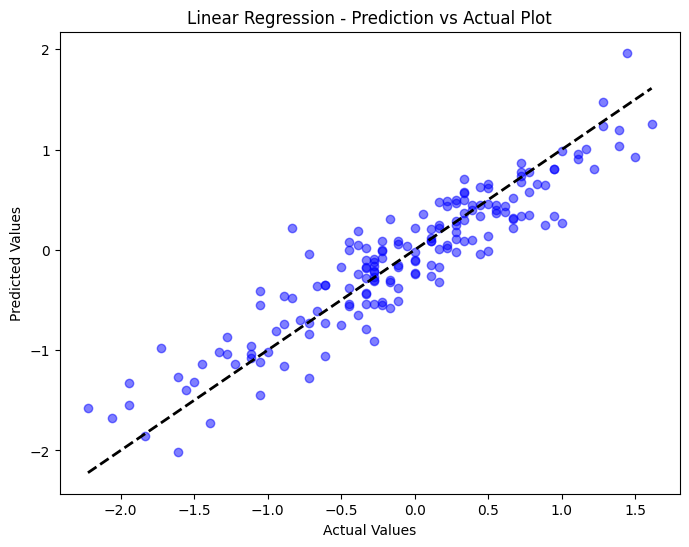

In [31]:
#@title 4 Final Model : Linear Regression (in compliance with requirements)

model=LinearRegression()
# Creating an instance of LinearRegression to be used for modeling
model.fit(X_train, y_train)
# training the model with the training sets acquired from train_test_split

y_pred = model.predict(X_test)
# executing model prediction

MeanSQ = mean_squared_error(y_test, y_pred)
print('Mean squared error (lower is better): ', round(MeanSQ, 5))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

r2 = r2_score(y_test, y_pred)
print('R2 score: ', round(r2*100, 5), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', round(rmse, 5))
# Evaluates the model by seeing the differences between the target values and the predicted variables

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Prediction vs Actual Plot')
plt.show()

Mean squared error (lower is better): 0.09169
R2 score: 84.73418 %
Root Mean Squared Error (RMSE):  0.30293


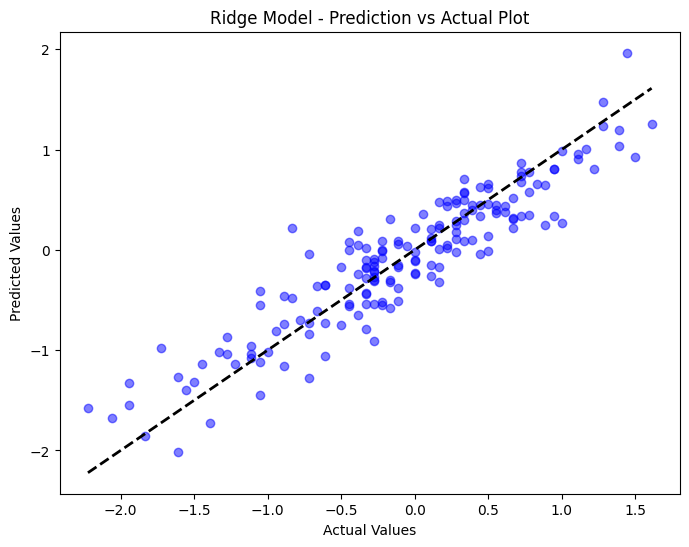

In [32]:
#@title 4 Final Model : Ridge model (based on testing)

ridge_model = Ridge(alpha=0.01, solver='saga', random_state=42)
# Creating an instance of the Ridge regression model with the best hyperparameters from cross-validation

ridge_model.fit(X_train, y_train)
# Training the model with the training sets acquired from train_test_split

y_pred_ridge = ridge_model.predict(X_test)
# Executing model prediction

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean squared error (lower is better):', round(MSE_ridge, 5))
# Evaluate the model by comparing its predictions to testing set if it is close, the mean square error
# measures the average squared difference of the predicted and testing values.
# Lower MSEs indicate better model prediction, here it is executed and is printed for evaluation purposes

R2_ridge = r2_score(y_test, y_pred_ridge)
print('R2 score:', round(R2_ridge * 100, 5), '%')
# Evaluates the model by seeing how the model would be able to predict the target variable, this shows
# the predictability score of the model ranging between 0 and 1

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', round(rmse, 5))
# Evaluates the model by seeing the differences between the target values and the predicted variables

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Model - Prediction vs Actual Plot')
plt.show()


In [ ]:
#@title 5 Evaluation: Feature Analysis

importance_type = 'weight'
# indicate what classification to base the importance on, in this case, the score is based on the weight

feature_importance = xgb_model.get_booster().get_score(importance_type=importance_type)
# the get_booster() obtains the boosters that were used from the chosen model which was the xgb_model from the
# previous cell, with those obtained, the get_score will then retrieve the scores based on the type that was
# selected which was 'weight'

sorted_feature_importance = {
    # creates a dictionary where the feature and its corresponiding score will be stored
    k: v for k, v in sorted(
        feature_importance.items(),
        key=lambda item: item[1],
        reverse=True)
    # it will iterate through the items inside feature_importance which was created above where the
    # key (meaning the current item being parsed) will be sorted in a descending order which is then followed
    # by the reverse being set to true
  }

# Print the sorted feature importance dictionary
print("Feature Importance:\n")
for feature, importance in sorted_feature_importance.items():
  # this will iterate through the entire dictionary and display each feature with its importance
    print(f"{feature}: {importance}")

Feature Importance:

3pa_zscore: 873.0
ft%_scaled: 686.0
ppg_minmax: 610.0
tov_zscore: 438.0
mpg_scaled: 411.0
fgm_minmax: 394.0
